In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import json

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Lectura de datos

In [3]:
# path a los archivos de datos
path_pozos = "datos/capitulo-iv-pozos.csv"
path_produccion_2024 = "datos/produccin-de-pozos-de-gas-y-petrleo-2024.csv"
path_no_convencionales = "datos/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv"

In [4]:
# lectura de datos
pozos = pd.read_csv(path_pozos)
prod_convencional = pd.read_csv(path_produccion_2024)
prod_no_convencional = pd.read_csv(path_no_convencionales)

/tmp/ipykernel_11836/1245160640.py:3: DtypeWarning: Columns (16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  prod_convencional = pd.read_csv(path_produccion_2024)


# Análisis exploratorio

## Pozos

In [5]:
pozos.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,255.00,1702.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,251.00,1350.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.15,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.70,1351.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.00,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...


In [6]:
# transformacion de tipo fechas
col_fechas = ["adjiv_fecha_inicio_perf", "adjiv_fecha_fin_perf", "adjiv_fecha_inicio_term", "adjiv_fecha_fin_term"]
for col in col_fechas:
    pozos[col] = pd.to_datetime(pozos[col], format="%Y-%m-%d")

In [7]:
pozos.shape

(84332, 26)

In [8]:
area_to_cod_area = pozos.groupby('area')['cod_area'].nunique()
area_one_to_one = (area_to_cod_area <= 1).all()
area_one_to_one

np.False_

In [9]:
area_cod_mayor_uno = set(area_to_cod_area[area_to_cod_area > 1].index)

In [10]:
heatmap_areas_codigos = pozos[pozos['area'].isin(area_cod_mayor_uno)][["area", "cod_area"]].pivot_table(index="area", columns="cod_area", aggfunc="size", fill_value=0)

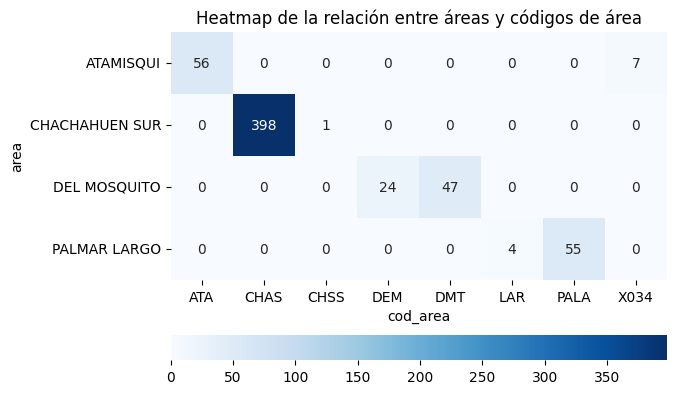

In [11]:
# plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_areas_codigos, cmap="Blues", annot=True, fmt="d", cbar=True, cbar_kws={'orientation': 'horizontal'})
plt.title("Heatmap de la relación entre áreas y códigos de área")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [12]:
pozos[(pozos["area"] == "ATAMISQUI") & (pozos["cod_area"] == "X034")]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
7950,EQ-1,39234,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1067.28,1897.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.55920000000...",0101000020E610000016FBCBEEC92351C008AC1C5A64CF...
7951,EQ-2,39235,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1072.60,1538.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.53522999999...",0101000020E6100000A3755435412251C0CCD1E3F736D9...
7952,M.EQ.x-4,39236,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1181.40,2104.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.61368000000...",0101000020E6100000658D7A88462751C01D7233DC80CF...
7954,M.EQ.a-6,39238,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1150.93,2125.0,No informado,No informado,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.63120999999...",0101000020E61000001FBAA0BE652851C005FA449E24CD...
7956,YPF.Md.EQ.x-8,39240,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1144.64,2244.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.58921999999...",0101000020E61000008B89CDC7B52551C04D672783A3D4...
7957,YPF.Md.EQ.x-10,39241,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1107.00,2191.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.56901000000...",0101000020E61000003546EBA86A2451C0CEC29E76F8CB...
25482,YPF.Md.LNG.x-1,77771,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1080.43,1814.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.53776999999...",0101000020E610000046B1DCD26A2251C0A6ED5F5969D2...


In [13]:
def plot_mapa_pozos(pozos_df):
    geometry = [Point(xy) for xy in zip(pozos_df['longitude'], pozos_df['latitude'])]
    pozos_gdf = gpd.GeoDataFrame(pozos_df, geometry=geometry, crs="EPSG:4326")

    argentina = gpd.read_file("datos/argentina.geojson")
    argentina.plot(ax=plt.gca(), color='lightblue', edgecolor='black')

    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the argentina GeoDataFrame
    argentina.plot(ax=ax, color='lightblue', edgecolor='black', label="Argentina")

    # Plot the pozos GeoDataFrame
    pozos_gdf.plot(ax=ax, color='blue', marker='o', markersize=20, label="Pozos", alpha=0.7)

    # Customize the plot
    plt.title("Geospatial Data: Pozos and Argentina")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()

    # Show the plot
    plt.show()

In [14]:
# Extract coordinates from the geojson column
def extract_coordinates(geojson_str):
    geojson = json.loads(geojson_str)
    return geojson['coordinates']

pozos['coordinates'] = pozos['geojson'].apply(extract_coordinates)
pozos['longitude'] = pozos['coordinates'].apply(lambda x: x[0])
pozos['latitude'] = pozos['coordinates'].apply(lambda x: x[1])

/tmp/ipykernel_11836/397628586.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


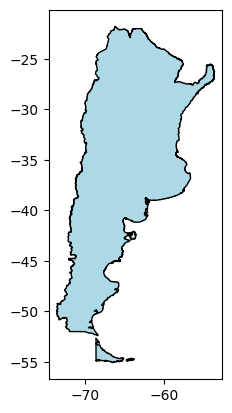

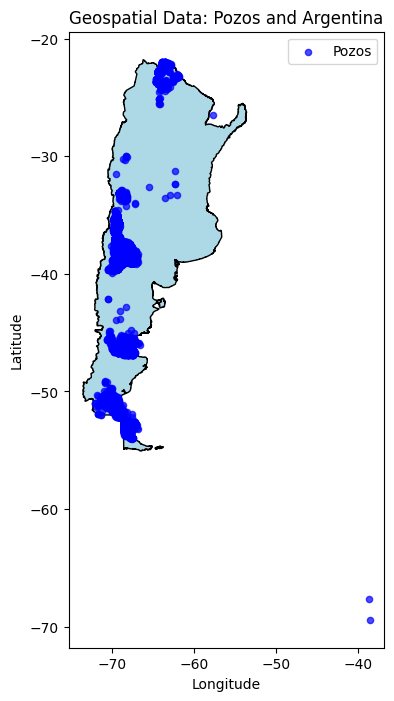

In [15]:
plot_mapa_pozos(pozos)

Hay dos pozos en el medio de la nada

In [16]:
pozos[pozos["longitude"] > -40]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude
4613,SJ.RN.LN-7,10143,LOMA NEGRA,LNE,CAPEX S.A.,LOMA NEGRA,LNE,lajas,NEUQUINA,Rio Negro,396.31,3329.0,EXPLOTACION,DESARROLLO,No informado,No informado,no,Petrolífero,Electrosumergible,Extracción Efectiva,1998-10-19,1998-11-09,1999-02-09,1999-02-20,"{""type"":""Point"",""coordinates"":[-38.756338,-67....",0101000020E61000006C5CFFAECF6043C0682096CD1CE9...,"[-38.756338, -67.642383]",-38.756338,-67.642383
80786,PBE.Nq.M-1063(d),162058,EL MANGRULLO,GRU,PAMPA ENERGIA S.A.,EL MANGRULLO,MGR,agrio,NEUQUINA,Neuquén,649.10,1525.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,TIGHT,no,Gasífero,Surgencia Natural,Extracción Efectiva,2019-06-22,2019-07-03,2020-12-17,2021-01-06,"{""type"":""Point"",""coordinates"":[-38.59006999999...",0101000020E6100000E42CEC69874B43C01B2AC6F99B5A...,"[-38.59007, -69.41577]",-38.590070,-69.415770


Parece que latitud y longitud están intercambiados

In [17]:
# swap long and lat of idpozo 10143 and 162058
pozos.loc[pozos["idpozo"] == 10143, ["latitude", "longitude"]] = pozos.loc[pozos["idpozo"] == 10143, ["longitude", "latitude"]].values
pozos.loc[pozos["idpozo"] == 162058, ["latitude", "longitude"]] = pozos.loc[pozos["idpozo"] == 162058, ["longitude", "latitude"]].values

In [18]:
pozos.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,255.00,1702.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...,"[-68.287853, -45.591133]",-68.287853,-45.591133
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,251.00,1350.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...,"[-68.292019, -45.592025]",-68.292019,-45.592025
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.15,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...,"[-68.283878, -45.590244]",-68.283878,-45.590244
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.70,1351.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...,"[-68.289483, -45.594069]",-68.289483,-45.594069
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.00,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...,"[-68.294475, -45.59445]",-68.294475,-45.594450


/tmp/ipykernel_11836/397628586.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


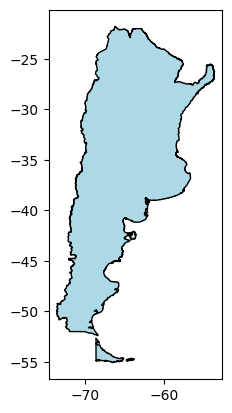

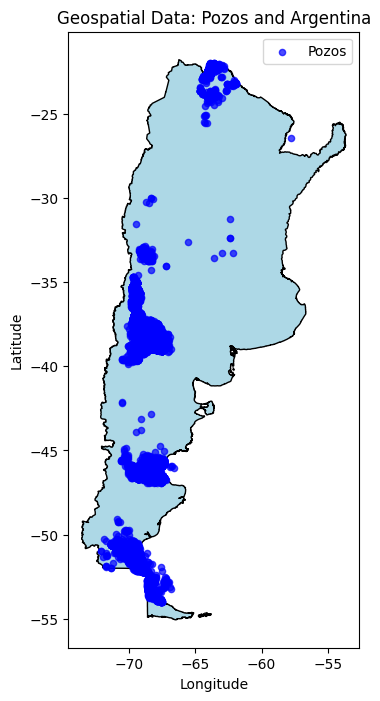

In [19]:
plot_mapa_pozos(pozos)

In [20]:
pozos["provincia"].value_counts()

provincia
Santa Cruz          23615
Chubut              22306
Neuquén             18682
Mendoza              8853
Rio Negro            5749
La Pampa             2724
Tierra del Fuego     1242
Salta                 965
Estado Nacional        73
Formosa                65
Jujuy                  46
San Juan                6
Córdoba                 6
Name: count, dtype: int64

In [21]:
def to_gdf(pozos_df, nombre_longitud = 'longitude', nombre_latitud = 'latitude'):
    geometry = [Point(xy) for xy in zip(pozos_df['longitude'], pozos_df['latitude'])]
    return gpd.GeoDataFrame(pozos_df, geometry=geometry, crs="EPSG:4326")

def plot_mapa_clipped(pozos_df, bounding_box):
    # Convert to GeoDataFrame
    pozos_gdf = to_gdf(pozos_df)

    argentina = geojson_data = gpd.read_file("datos/argentina.geojson")
    argentina.plot(ax=plt.gca(), color='lightblue', edgecolor='black')

    fig, ax = plt.subplots(figsize=(10, 8))
    bounding_box_gdf = gpd.GeoDataFrame({'geometry': [bounding_box]}, crs="EPSG:4326")

    # Clip Argentina GeoDataFrame to the bounding box
    argentina_clipped = gpd.clip(argentina, bounding_box_gdf)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot clipped Argentina GeoDataFrame
    argentina_clipped.plot(ax=ax, color='lightblue', edgecolor='black', label="Argentina")

    # Plot filtered pozos GeoDataFrame
    pozos_gdf.plot(ax=ax, color='blue', marker='o', markersize=10, label="Pozos", alpha=0.7)

    # Customize the plot
    plt.title("Geospatial Data: Pozos and Argentina (Clipped)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()

    # Show the plot
    plt.show()

/tmp/ipykernel_11836/2678751319.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


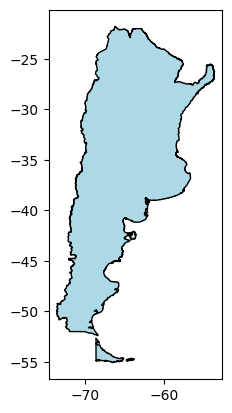

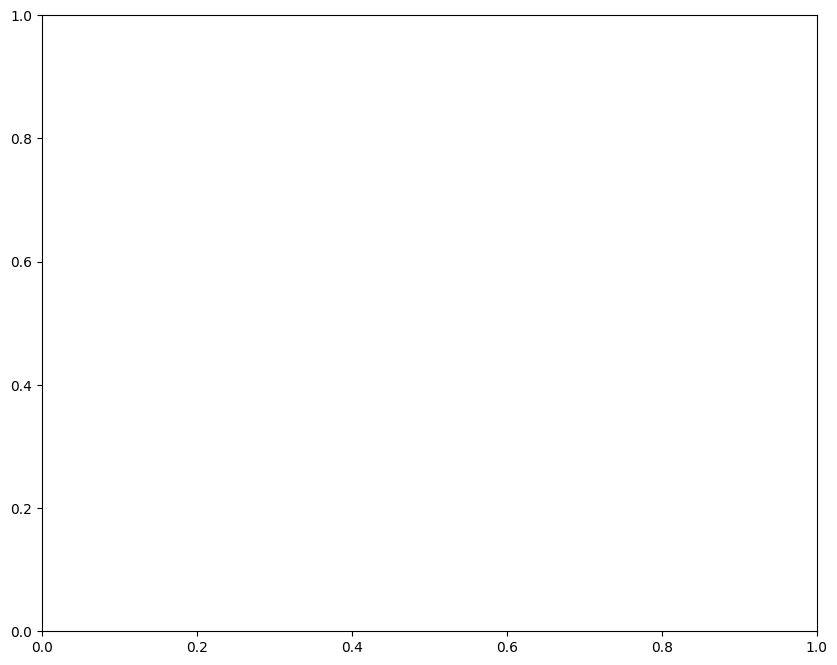

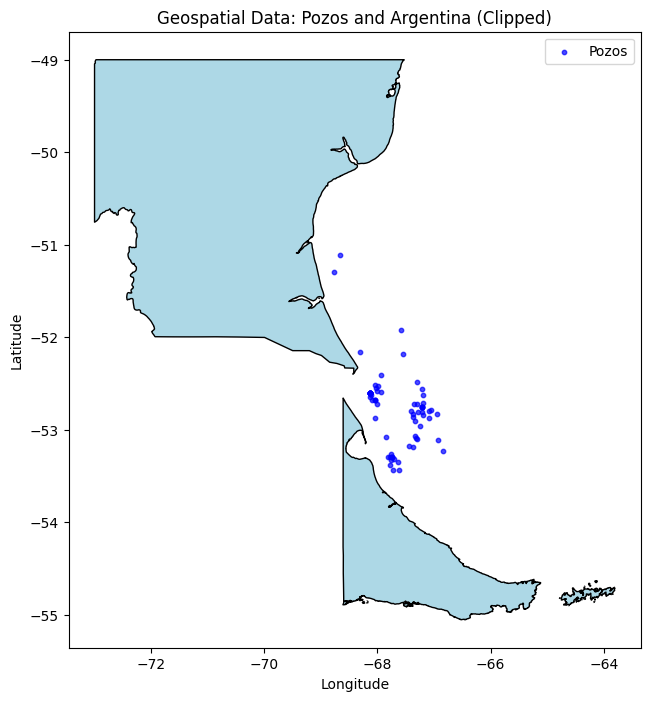

In [22]:
from shapely.geometry import box

# plot los pozos con provincia igual a "Estado Nacional"
pozos_estado_naciona = pozos[pozos["provincia"] == "Estado Nacional"]
box_to_clip = box(-73, -60, -60, -49)
plot_mapa_clipped(pozos_estado_naciona, box_to_clip)

## Produccion no convencional

In [23]:
prod_no_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,132738,0.000,32.777,1.47,0.0,0.0,0.0,0.0,30.92,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1036,PREC,2750.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.193743,-39.078336,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2015,1,136137,2.590,494.570,11.50,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1199(d),PREC,3375.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.224930,-38.867937,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
2,YSUR,2018,1,132604,0.000,43.771,0.00,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.Gu-1189d,PREC,2647.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.241585,-38.871419,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2017,1,137602,0.000,444.020,51.01,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2017-02-16 13:45:37.233373,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1186(h)(I),BASA,3524.0,basamento,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.245305,-38.853815,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2017-01-31
4,YSUR,2018,1,132492,14.353,430.948,25.89,0.0,0.0,0.0,0.0,31.00,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1030,PREC,2752.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.185218,-39.078200,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31


## Produccion 2024

In [24]:
diff_cols_2024 = set(prod_convencional.columns) - set(prod_no_convencional.columns)
diff_cols_no_conv = set(prod_no_convencional.columns) - set(prod_convencional.columns)
diff_cols_2024, diff_cols_no_conv

(set(), {'coordenadax', 'coordenaday'})

In [25]:
prod_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.BLO.es-1,FIMP,1963.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.PS.x-1,FIMP,1600.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDR.x-1,PROS,2058.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


# Unicidad de datos
Nos gustaria verificar que: 
- Todos los pozos que estan en el dataset principal, tambien esten en alguno de los otros dos.
- Los pozos que estan en el dataset de pozos convencionales esten en el principal.
- Los pozos que estan el el dataset de pozos no convencionales esten en el principal.
- No este el mismo pozo en el dataset convencional y no convencional a la vez.
- Las ids de cada dataset sean unicas.

In [26]:
ids_pozos = set(pozos['idpozo'])
ids_produccion_2024 = set(prod_convencional['idpozo'])
ids_no_convencionales = set(prod_no_convencional['idpozo'])

In [27]:
cnt = pozos['idpozo'].value_counts()
len(cnt[cnt > 1])

0

La tabla principal no tiene duplicados.

In [28]:
prod_convencional['idpozo'].value_counts()

idpozo
154225    10
153840    10
137570    10
137420    10
145324    10
          ..
165738     1
165737     1
165736     1
165705     1
165703     1
Name: count, Length: 82243, dtype: int64

Se puede observar que en la tabla de pozos convencionales la mayoria de las ids se encuentran repetidas.

In [29]:
prod_no_convencional['idpozo'].value_counts()

idpozo
96629     226
96641     226
96687     226
96665     226
96664     226
         ... 
165700      1
165703      1
165743      1
165699      1
165698      1
Name: count, Length: 4207, dtype: int64

Lo mismo ocurre en la de pozos no convencionales.

In [30]:
ids_en_ninguno_de_los_dos = ids_pozos - ids_produccion_2024 - ids_no_convencionales

len(ids_en_ninguno_de_los_dos)

2126

Hay cerca de 2000 que no son ni nconvencionales ni no convencionales.

In [31]:
ids_en_ambos_df = ids_produccion_2024 & ids_no_convencionales

len(ids_en_ambos_df)

4189

Vemos que hay pozos que son a la vez convencionales y no convencionales.

In [32]:
ids_prod_24_no_en_pozos = ids_produccion_2024 - ids_pozos

len(ids_prod_24_no_en_pozos)

55

Tambien hay pozos que estan en la lista de convencionales pero no en la general.

In [33]:
ids_no_conv_no_en_pozos = ids_no_convencionales - ids_pozos

len(ids_no_conv_no_en_pozos)

3

Lo mismo para los no convencionales, exploremos mas en detalle este caso que son pocos.

In [34]:
no_conv_no_en_pozos = prod_no_convencional[prod_no_convencional['idpozo'].isin(ids_no_conv_no_en_pozos)]
no_conv_no_en_pozos

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
271009,PAL,2024,10,165768,284.1272,23.44430,4332.90200,0.0,0.0,0.0,0.0,30.279860,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-145(h),VMUT,6475.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465997,-38.590230,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31
271369,PAL,2024,10,165767,547.7212,47.53449,3960.73900,0.0,0.0,0.0,0.0,30.263890,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-141(h),VMUT,6423.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465883,-38.590171,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31
271523,PAL,2024,10,165757,0.0000,17.71623,31.91664,0.0,0.0,0.0,0.0,0.552083,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.APO-243(h),VMUT,6043.0,vaca muerta,APO,AGUADA PICHANA OESTE,APO,AGUADA PICHANA OESTE,NEUQUINA,Neuquén,-69.408358,-38.454249,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31


Veamos los pozos mas cercanos de la lista principal a los 3 que no aparecen de no convencionales

In [35]:
import math

def mas_cercano(pozo, pozos_df):
    min_dist = float('inf')
    id_mas_cerc = None
    for row in pozos_df.itertuples():
        dist = math.sqrt(((pozo['coordenadax'] - row.longitude) ** 2) + ((pozo['coordenaday'] - row.latitude) ** 2))
        if dist < min_dist:
            min_dist = dist
            id_mas_cerc = row.idpozo
    return id_mas_cerc

no_conv_no_en_pozos['idpozo_mas_cerc'] = no_conv_no_en_pozos.apply(lambda row: mas_cercano(row, pozos), axis=1)

no_conv_no_en_pozos

/tmp/ipykernel_11836/2712397496.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_conv_no_en_pozos['idpozo_mas_cerc'] = no_conv_no_en_pozos.apply(lambda row: mas_cercano(row, pozos), axis=1)


,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,idpozo_mas_cerc
271009,PAL,2024,10,165768,284.1272,23.44430,4332.90200,0.0,0.0,0.0,0.0,30.279860,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-145(h),VMUT,6475.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465997,-38.590230,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165653
271369,PAL,2024,10,165767,547.7212,47.53449,3960.73900,0.0,0.0,0.0,0.0,30.263890,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-141(h),VMUT,6423.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465883,-38.590171,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165653
271523,PAL,2024,10,165757,0.0000,17.71623,31.91664,0.0,0.0,0.0,0.0,0.552083,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.APO-243(h),VMUT,6043.0,vaca muerta,APO,AGUADA PICHANA OESTE,APO,AGUADA PICHANA OESTE,NEUQUINA,Neuquén,-69.408358,-38.454249,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165535


In [36]:
pozos[pozos['idpozo'].isin(no_conv_no_en_pozos['idpozo_mas_cerc'])]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude
84123,PAE.Nq.APO-245(h),165535,AGUADA PICHANA OESTE,APO,PAN AMERICAN ENERGY SL,AGUADA PICHANA OESTE,APO,vaca muerta,NEUQUINA,Neuquén,856.56,6124.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,SHALE,no,Gasífero,Surgencia Natural,Extracción Efectiva,2024-01-27,2024-05-16,2024-05-20,2024-06-29,"{""type"":""Point"",""coordinates"":[-69.40849500000...",0101000020E6100000176536C8245A51C0CF9ECBD4243A...,"[-69.408495, -38.454249]",-69.408495,-38.454249
84241,PAE.Nq.ECh-143(h),165653,LINDERO ATRAVESADO,LAT,PAN AMERICAN ENERGY SL,LINDERO ATRAVESADO OCCIDENTAL,LAOC,vaca muerta,NEUQUINA,Neuquén,421.13,6481.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,SHALE,no,Petrolífero,Surgencia Natural,Extracción Efectiva,2024-02-05,2024-05-27,2024-08-04,2024-08-27,"{""type"":""Point"",""coordinates"":[-68.46611699999...",0101000020E610000004C765DCD41D51C0221807978E4B...,"[-68.466117, -38.590289]",-68.466117,-38.590289


Se puede ver que estos pozos tienen 2 muy cercanos en la lista principal, pero ni la ID ni la sigla coinciden, aunque pareceria que la sigla tiene algun significado. Con mas informacion sobre como funcionan las siglas quizas se podria desambiguar esta falta de unicidad.

# Cruce con datos del IGN

De los documentos provistos por https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG, los mas interesantes para enriquecer este trabajo podrian ser la capa "Yacimiento de hidrocarburo" en la categoria "industria y servicios", a partir de la cual podriamos definir una distancia maxima aceptable de nuestros pozos a cada uno de esos yacimientos, y considerar como outliers a los que esten mas lejos que eso. Tambien de la capa "Provincia" en la categoria "Geodesia y demarcacion" podriamos utilizar los poligonos para validar que los posos se encuentren en la provincia que dicen estar.

# Análisis descriptivo de producción 2024

Vamos a realizar un análisis descriptivo de la producción de petroleo para el año 2024. Lo primero que nos interesa es definir los origenes de datos. Los datos de producción de convencionales y no convencionales van a venir de sus correspondientes dataset. Los datos de pozos van a provenir de la tabla maestra de pozos.

Hacemos un análisis inicial de los datos

In [37]:
prod_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.BLO.es-1,FIMP,1963.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.PS.x-1,FIMP,1600.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDR.x-1,PROS,2058.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


In [38]:
prod_no_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,132738,0.000,32.777,1.47,0.0,0.0,0.0,0.0,30.92,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1036,PREC,2750.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.193743,-39.078336,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2015,1,136137,2.590,494.570,11.50,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1199(d),PREC,3375.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.224930,-38.867937,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
2,YSUR,2018,1,132604,0.000,43.771,0.00,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.Gu-1189d,PREC,2647.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.241585,-38.871419,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2017,1,137602,0.000,444.020,51.01,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2017-02-16 13:45:37.233373,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1186(h)(I),BASA,3524.0,basamento,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.245305,-38.853815,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2017-01-31
4,YSUR,2018,1,132492,14.353,430.948,25.89,0.0,0.0,0.0,0.0,31.00,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1030,PREC,2752.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.185218,-39.078200,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31


Lo primero que vemos es que ambos datasets tienen muchas columnas en común, para el análisis resultaría más útil trabajar con un solo dataset de mediciones.

Primero veamos si comparten todas las columnas

In [39]:
set(prod_convencional.columns) - set(prod_no_convencional.columns)

set()

In [40]:
set(prod_no_convencional.columns) - set(prod_convencional.columns)

{'coordenadax', 'coordenaday'}

Luego queremos ver que todas las columnas, además tengan datos de características similares

In [41]:
prod_convencional.describe()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,idusuario,profundidad
count,818788.0,818788.000000,818788.000000,818788.000000,818788.000000,818788.000000,818788.000000,818788.000000,818788.0,818788.000000,818788.000000,19039.0,818788.000000,818788.000000
mean,2024.0,5.506455,102537.938606,41.412319,52.588573,346.971979,351.584624,0.035328,0.0,0.684062,10.269560,0.0,375.764029,1680.875718
std,0.0,2.872134,42579.653851,272.582862,751.650676,1185.001033,2004.356117,4.950794,0.0,116.840692,13.953554,0.0,54.467583,1716.342361
min,2024.0,1.000000,212.000000,-0.010000,-0.010000,-0.510000,0.000000,0.000000,0.0,0.000000,-0.010000,0.0,3.000000,0.000000
25%,2024.0,3.000000,71281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,334.000000,1048.000000
50%,2024.0,6.000000,110359.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,345.000000,1590.000000
75%,2024.0,8.000000,133044.000000,9.526457,0.000000,18.610000,0.000000,0.000000,0.0,0.000000,29.130000,0.0,420.000000,2335.000000
max,2024.0,10.000000,165770.000000,19826.739000,150618.900000,43783.000000,175180.420000,1545.200000,0.0,34845.310000,31.000000,0.0,482.000000,378939.000000


In [42]:
prod_no_convencional.describe()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,idusuario,profundidad,coordenadax,coordenaday
count,324077.000000,324077.000000,324077.000000,324077.000000,324077.000000,324077.000000,324077.000000,324077.000000,324077.0,324077.0,324077.000000,6465.000000,324077.000000,324077.000000,324077.000000,324077.000000
mean,2019.554205,6.520167,149294.062473,265.390764,636.862280,152.406398,15.823057,1.681994,0.0,0.0,22.037094,189.811965,352.277184,3626.786745,-68.830274,-38.950768
std,3.806477,3.399374,19190.701717,816.047802,1601.371119,512.622035,651.046220,540.620514,0.0,0.0,12.164222,936.215796,71.969038,6741.747203,0.702312,2.395898
min,2006.000000,1.000000,3640.000000,-0.001000,-12.267000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3.000000,0.000000,-71.361390,-69.415770
25%,2017.000000,4.000000,145716.000000,0.000000,8.520000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,0.000000,334.000000,2830.000000,-69.185218,-38.831960
50%,2020.000000,7.000000,155225.000000,6.630000,110.650000,11.660000,0.000000,0.000000,0.0,0.0,29.250000,0.000000,334.000000,3189.100000,-68.870022,-38.536383
75%,2023.000000,9.000000,159225.000000,81.862000,485.060000,73.294000,0.000000,0.000000,0.0,0.0,30.660420,0.000000,381.000000,4230.000000,-68.466101,-38.320900
max,2024.000000,12.000000,165768.000000,19826.739000,29129.660000,24615.830000,61075.260000,219701.660000,0.0,0.0,79.340000,11415.210000,482.000000,378939.000000,-38.590070,-24.116560


Como ambas tablas tienen las mismas columnas excepto por las coordenadas, que en realidad corresponden a datos de pozos, vamos a concatenar ambos datasets agregando una nueva columna que indique el tipo de extracción, para no perder el dato del dataset del que proviene el registro.

In [43]:
prod_no_convencional["is_no_convencional"] = True
prod_convencional["is_no_convencional"] = False

In [44]:
# Eliminamos columnas coordenadas de no_convencionales
prod_no_convencional = prod_no_convencional.drop(columns=["coordenadax", "coordenaday"])

In [45]:
# concatenamos ambos dataframes
produccion_total = pd.concat([prod_convencional, prod_no_convencional], ignore_index=True)

In [46]:
# vemos cuantos registros duplicados hay
produccion_total.duplicated(keep=False).sum()

np.int64(0)

In [47]:
# cuando registros duplicados en anio, mes y pozo hay
mask_duplicados_anio_mes_pozo = produccion_total.duplicated(subset=["anio", "mes", "idpozo"], keep=False)
mask_duplicados_anio_mes_pozo.sum()

np.int64(80160)

In [48]:
# vemos los duplicados
produccion_total[mask_duplicados_anio_mes_pozo].sort_values(by=["anio", "mes", "idpozo"]).head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional
796972,ACO,2024,1,3640,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,ACO,2024-02-03 20:56:57.063891,f,t,459,Petrolera Aconcagua Energia S.A.,PPC.Nq.EC-4,VMUT,2585.0,vaca muerta,ELO,ENTRE LOMAS,ECL,EL CARACOL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2024-01-31,False
1142769,ACO,2024,1,3640,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,ACO,2024-02-03 20:56:57.063891,f,t,459,Petrolera Aconcagua Energia S.A.,PPC.Nq.EC-4,VMUT,2585.0,vaca muerta,ELO,ENTRE LOMAS,ECL,EL CARACOL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2024-01-31,True
402890,TPT,2024,1,8043,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Sin Sistema de Extracción,Parado Transitoriamente,Gasífero,NaN,2024-02-16 10:24:29.49109,f,t,364,TECPETROL S.A.,YPF.Nq.FP.x-2,VMUT,3243.0,vaca muerta,FOR,FORTIN DE PIEDRA,FOR,FORTIN DE PIEDRA,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,SHALE,2024-01-31,False
1014236,TPT,2024,1,8043,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Sin Sistema de Extracción,Parado Transitoriamente,Gasífero,NaN,2024-02-16 10:24:29.49109,f,t,364,TECPETROL S.A.,YPF.Nq.FP.x-2,VMUT,3243.0,vaca muerta,FOR,FORTIN DE PIEDRA,FOR,FORTIN DE PIEDRA,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,SHALE,2024-01-31,True
779119,APS,2024,1,10073,14.05,332.7,21.53,0.0,0.0,0.0,0.0,30.75,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2024-02-14 15:27:12.140054,f,t,383,CAPEX S.A.,CSJ.RN.LMa.a-3,LAJA,3850.0,lajas,LNE,LOMA NEGRA,LOMA,LOMA DE MARÍA,NEUQUINA,Rio Negro,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,TIGHT,2024-01-31,False


Parece que existen registros duplicados ya que el dataset de producción 2024 incluía datos de producción no convencional. Verifiquemos que coinciden todas las columnas menos la que indica el tipo de extracción.

In [49]:
cols_sin_tipo_extraccion = set(produccion_total.columns) - {"is_no_convencional"}
mask_duplicados_anio_mes_pozo = produccion_total.duplicated(subset=cols_sin_tipo_extraccion, keep=False)
mask_duplicados_anio_mes_pozo.sum()

np.int64(80160)

Es decir coinciden todas las columnas menos la que generamos manualmente al concatenar ambos datasets. Vamos a eliminar los duplicados, quedandonos con la primer aparición

In [50]:
produccion_total.drop_duplicates(subset=cols_sin_tipo_extraccion, keep="first", inplace=True)

In [51]:
# verificamos que ahora no queden registros de pozos, anio y mes duplicados
mask_duplicados_anio_mes_pozo = produccion_total.duplicated(subset=["anio", "mes", "idpozo"], keep=False)
mask_duplicados_anio_mes_pozo.sum()

np.int64(0)

In [52]:
produccion_total.sample(5)

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional
657631,CHE,2024,10,136360,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,Sin Sistema de Extracción,En Estudio,Petrolífero,NaN,2024-11-20 09:35:55.939719,f,t,367,CHEVRON ARGENTINA S.R.L.,CHA.Nq.ET-1129,HUIT,1433.8,huitrín,ETE,EL TRAPIAL ESTE,TRA,EL TRAPIAL,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-10-31,False
323350,YPF,2024,9,104558,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,Sin Sistema de Extracción,Abandonado,Otro tipo,NaN,2024-10-16 12:13:37.009327,f,t,334,YPF S.A.,YPF.SC.CS-2164,CSEC,2200.0,cañadon seco,CLM,CAÑADON LEON - MESETA ESPINOSA,CSEC,CAÑADON SECO,GOLFO SAN JORGE,Santa Cruz,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-09-30,False
446365,PTM,2024,8,365,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Otras Situación Inactivo,Gasífero,Cargado automáticamente como [Sin movimientos],2024-09-20 14:45:00.469007,f,t,356,PETROMINERA CHUBUT S.E.,M-57,FIMP,567.0,formación improductiva,PIL,CAÑADON PILAR,PIL,CAÑADON PILAR,GOLFO SAN JORGE,Chubut,CONVENCIONAL,Sin Proyecto,NaN,NaN,NaN,2024-08-31,False
472701,PLU,2024,3,134961,0.0,0.0,0.0,2430.05,0.0,0.0,0.0,31.0,NaN,Sin Sistema de Extracción,En Inyección Efectiva,Inyección de Agua,Inyector de Polimeros-RecuperaciÃ³n Asistida,2024-04-11 11:35:34.94503,f,t,381,PLUSPETROL S.A.,PAR.MdN.CoHS.a-90,CENT,700.0,centenario,JCPA,JAGÜEL CASA DE PIEDRA,CHUS,CERRO HUANUL SUR,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR TERCIARIA,NaN,2024-03-31,False
308179,YPF,2024,8,111866,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,Sin Sistema de Extracción,En Espera de Reparación,Otro tipo,NaN,2024-09-16 12:01:39.202537,f,t,334,YPF S.A.,YPF.Nq.ChSN-88,AGRI,1400.0,agrio,CSN,CHIHUIDO DE LA SIERRA NEGRA,CSN,CHIHUIDO DE LA SIERRA NEGRA,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-08-31,False


In [53]:
produccion_total["anio"].value_counts().sort_index()

anio
2006      2368
2007      2442
2008      2280
2009      1698
2010      2038
2011      2599
2012      3640
2013      5184
2014      8777
2015     12841
2016     17225
2017     20734
2018     24895
2019     28917
2020     31716
2021     34506
2022     38918
2023     43219
2024    818788
Name: count, dtype: int64

In [54]:
# nos quedamos unicamente con datos de 2024
mask_2024 = produccion_total["anio"] == 2024
produccion_2024 = produccion_total[mask_2024]

In [55]:
# armo columna de periodo a partir de anio y mes
produccion_2024["periodo"] = pd.to_datetime(produccion_2024["anio"].astype(str) + "-" + produccion_2024["mes"].astype(str), format="%Y-%m")

/tmp/ipykernel_11836/2720416088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produccion_2024["periodo"] = pd.to_datetime(produccion_2024["anio"].astype(str) + "-" + produccion_2024["mes"].astype(str), format="%Y-%m")


## Petroleo 2024

In [56]:
produccion_2024.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional,periodo
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.BLO.es-1,FIMP,1963.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False,2024-01-01
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.PS.x-1,FIMP,1600.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False,2024-01-01
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDR.x-1,PROS,2058.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False,2024-01-01
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31,False,2024-01-01
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False,2024-01-01


In [57]:
produccion_2024["tipopozo"].value_counts()

tipopozo
Petrolífero                        381623
Otro tipo                          277341
Inyección de Agua                   85851
Gasífero                            64423
Sumidero                             6239
Acuífero                             3089
Inyección de Gas                      140
Bidireccional de almacenamiento        20
Monitoreo de almacenamiento            20
Inyector de almacenamiento              6
Name: count, dtype: int64

In [58]:
mask_otro_tipo = produccion_2024["tipopozo"] == "Otro tipo"
mask_prod_pet = produccion_2024["prod_pet"] > 0
produccion_2024[mask_otro_tipo & mask_prod_pet]

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional,periodo
143892,YPF,2024,4,147610,15.490,7.800,36.50,0.0,0.0,0.0,0.0,27.19,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-05-13 12:25:46.525508,f,t,334,YPF S.A.,YPF.Nq.AT.IA-247(d),LOTE,2367.0,lotena,LDL,LOMA LA LATA - SIERRA BARROSA,Z011,AGUADA TOLEDO,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-04-30,False,2024-04-01
180357,YPF,2024,5,147610,15.130,8.460,37.14,0.0,0.0,0.0,0.0,30.07,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-06-13 14:45:26.18741,f,t,334,YPF S.A.,YPF.Nq.AT.IA-247(d),LOTE,2367.0,lotena,LDL,LOMA LA LATA - SIERRA BARROSA,Z011,AGUADA TOLEDO,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-05-31,False,2024-05-01
180903,YPF,2024,5,144007,60.020,21.200,15.28,0.0,0.0,0.0,0.0,31.00,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-06-13 14:45:26.18741,f,t,334,YPF S.A.,APA.Nq.BBG-59(h),VMUT,2424.0,vaca muerta,NDD,AL NORTE DE LA DORSAL,BBGO,BAJO BARDA GONZALEZ,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-05-31,False,2024-05-01
219717,YPF,2024,6,144007,80.140,23.300,14.21,0.0,0.0,0.0,0.0,30.00,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-07-12 11:57:56.716292,f,t,334,YPF S.A.,APA.Nq.BBG-59(h),VMUT,2424.0,vaca muerta,NDD,AL NORTE DE LA DORSAL,BBGO,BAJO BARDA GONZALEZ,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-06-30,False,2024-06-01
219910,YPF,2024,6,147610,12.620,6.260,34.77,0.0,0.0,0.0,0.0,30.00,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-07-12 11:57:56.716292,f,t,334,YPF S.A.,YPF.Nq.AT.IA-247(d),LOTE,2367.0,lotena,LDL,LOMA LA LATA - SIERRA BARROSA,Z011,AGUADA TOLEDO,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-06-30,False,2024-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642452,EME,2024,8,146030,0.001,0.001,620.58,0.0,0.0,0.0,0.0,30.70,NaN,Bombeo Mecánico,Extracción Efectiva,Otro tipo,EMESA,2024-09-06 17:03:38.911723,f,t,480,E.M.E.S.A,YPF.MdN.LDM.a-80,AGRI,1606.0,agrio,LDM,LOMA DE LA MINA,LMI,LOMA DE LA MINA,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,NaN,2024-08-31,False,2024-08-01
642644,EME,2024,9,146031,0.001,0.000,180.00,0.0,0.0,0.0,0.0,30.70,NaN,Bombeo Mecánico,Extracción Efectiva,Otro tipo,EMESA,2024-10-02 17:23:32.460743,f,t,480,E.M.E.S.A,YPF.MdN.LDM.a-80,HUIT,1606.0,huitrín,LDM,LOMA DE LA MINA,LMI,LOMA DE LA MINA,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,NaN,2024-09-30,False,2024-09-01
642646,EME,2024,9,146030,0.001,0.000,1709.00,0.0,0.0,0.0,0.0,30.70,NaN,Bombeo Mecánico,Extracción Efectiva,Otro tipo,EMESA,2024-10-02 17:23:32.460743,f,t,480,E.M.E.S.A,YPF.MdN.LDM.a-80,AGRI,1606.0,agrio,LDM,LOMA DE LA MINA,LMI,LOMA DE LA MINA,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,NaN,2024-09-30,False,2024-09-01
642653,EME,2024,10,146031,0.001,0.000,692.70,0.0,0.0,0.0,0.0,30.00,NaN,Bombeo Mecánico,Extracción Efectiva,Otro tipo,EMESA,2024-11-15 17:33:35.551544,f,t,480,E.M.E.S.A,YPF.MdN.LDM.a-80,HUIT,1606.0,huitrín,LDM,LOMA DE LA MINA,LMI,LOMA DE LA MINA,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,NaN,2024-10-31,False,2024-10-01


<Axes: title={'center': 'Producción de petróleo por tipo de pozo en 2024'}, xlabel='Producción de petróleo (m3)', ylabel='Tipo de pozo'>

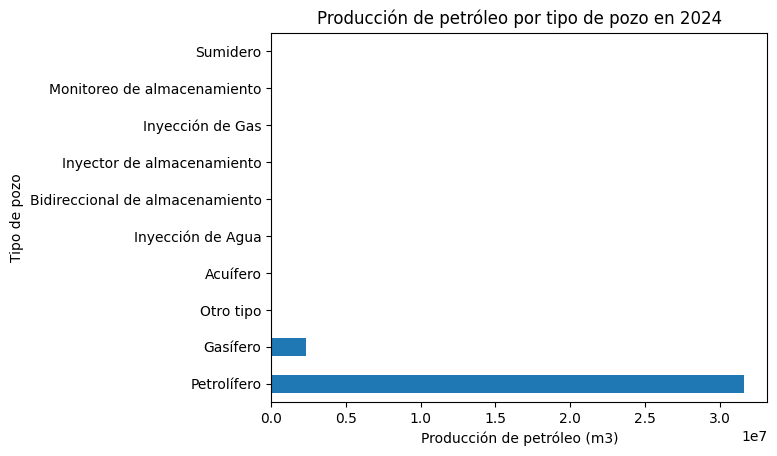

In [59]:
# format series to 2 decimal places
prod_por_tipo_pozo = produccion_2024.groupby("tipopozo")["prod_pet"].sum().round(2).sort_values(ascending=False)
prod_por_tipo_pozo.plot(kind="barh", title="Producción de petróleo por tipo de pozo en 2024", xlabel="Producción de petróleo (m3)", ylabel="Tipo de pozo")

In [60]:
# vemos porcentaje de producción de petroleo por tipo de pozo
((prod_por_tipo_pozo / prod_por_tipo_pozo.sum()) * 100).round(2)

tipopozo
Petrolífero                        93.23
Gasífero                            6.75
Otro tipo                           0.01
Acuífero                            0.00
Inyección de Agua                   0.00
Bidireccional de almacenamiento     0.00
Inyector de almacenamiento          0.00
Inyección de Gas                    0.00
Monitoreo de almacenamiento         0.00
Sumidero                            0.00
Name: prod_pet, dtype: float64

Luego para el análisis de producción de petroleo nos vamos a quedar con los pozos cuya variable tipopozo es una de {"Petrolífero", "Gasífero", "Otro Tipo"}

In [61]:
mask_tipo_pozo = ~produccion_2024["tipopozo"].isin({"Petrolífero", "Gasífero", "Otro Tipo"})
produccion_2024_petroleo = produccion_2024[mask_tipo_pozo]

<Axes: title={'center': 'Producción de petróleo en 2024'}, xlabel='Periodo', ylabel='Producción de petróleo (Mm3)'>

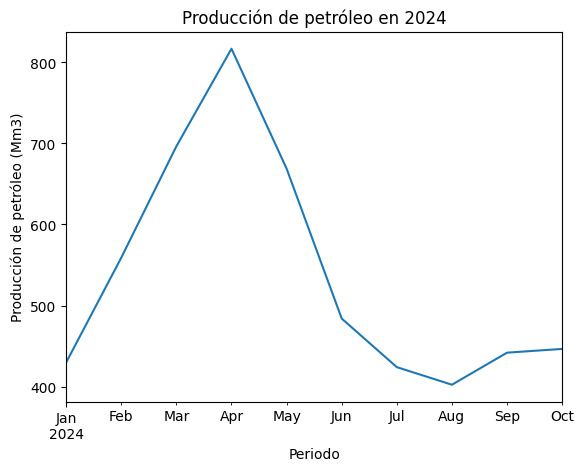

In [62]:
produccion_2024_petroleo.groupby("periodo")["prod_pet"].sum().plot(kind="line", title="Producción de petróleo en 2024", xlabel="Periodo", ylabel="Producción de petróleo (Mm3)")

In [63]:
produccion_2024_petroleo.describe()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,idusuario,profundidad,periodo
count,372742.0,372742.000000,372742.000000,372742.000000,372742.000000,372742.000000,372742.000000,372742.000000,372742.0,372742.000000,372742.000000,6659.0,372742.000000,372742.000000,372742
mean,2024.0,5.512362,99022.579543,0.014404,0.017411,3.655906,772.304717,0.039263,0.0,1.501117,3.314804,0.0,364.349547,1361.535643,2024-05-17 04:14:16.098856704
min,2024.0,1.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.000000,2024-01-01 00:00:00
25%,2024.0,3.000000,72173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,334.000000,685.000000,2024-03-01 00:00:00
50%,2024.0,6.000000,106333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,334.000000,1383.000000,2024-06-01 00:00:00
75%,2024.0,8.000000,121674.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,369.000000,2100.000000,2024-08-01 00:00:00
max,2024.0,10.000000,165766.000000,268.540000,1487.056000,43783.000000,175180.420000,1545.200000,0.0,34845.310000,31.000000,0.0,482.000000,27064.000000,2024-10-01 00:00:00
std,0.0,2.872443,35789.050441,1.019486,3.791539,249.197389,2915.484158,6.342183,0.0,173.167688,9.367965,0.0,51.642915,967.960029,NaN


<Axes: title={'center': 'Boxplot de producción de petróleo en 2024'}, ylabel='Producción de petróleo (m3)'>

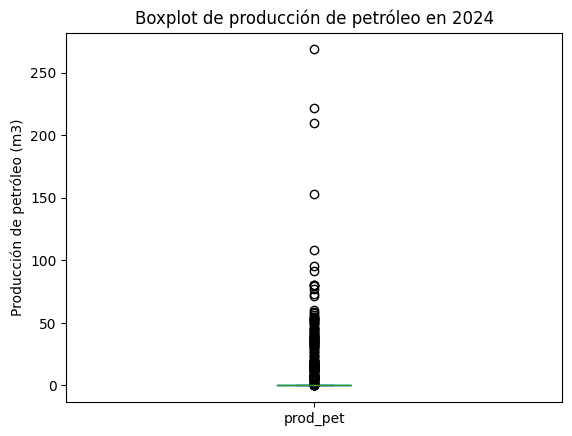

In [64]:
produccion_2024_petroleo["prod_pet"].plot(kind="box", title="Boxplot de producción de petróleo en 2024", ylabel="Producción de petróleo (m3)")

Vemos que hay muchos pozos con registros de producción en cero, veamos a qué se debe

In [65]:
produccion_2024_petroleo

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional,periodo
3,Z001,2024,1,145615,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31,False,2024-01-01
7,Z001,2024,1,32171,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Parado Transitoriamente,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,PDC.RG.x-1,PROS,1919.5,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-01-31,False,2024-01-01
38,Z001,2024,2,145615,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-03-22 08:41:34.516247,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-02-29,False,2024-02-01
39,Z001,2024,2,32171,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Parado Transitoriamente,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-03-22 08:41:34.516247,f,t,379,PETROLERA DEL COMAHUE S.A.,PDC.RG.x-1,PROS,1919.5,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-02-29,False,2024-02-01
66,Z001,2024,3,32171,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Parado Transitoriamente,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-04-15 11:12:16.006029,f,t,379,PETROLERA DEL COMAHUE S.A.,PDC.RG.x-1,PROS,1919.5,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-03-31,False,2024-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818713,ACO,2024,10,71888,0.0,0.0,0.0,17093.54195,0.0,0.0,0.0,24.8,NaN,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,ACO,2024-11-13 16:01:46.695822,f,t,459,Petrolera Aconcagua Energia S.A.,PC.RN.EM-1451,QTUC,1478.0,quintuco,VERN,25 DE MAYO - MEDANITO SUD ESTE RN,VERN,25 DE MAYO - MEDANITO SUDESTE RN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-10-31,False,2024-10-01
818723,ACO,2024,10,71886,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,NaN,Sin Sistema de Extracción,Parado Transitoriamente,Inyección de Agua,ACO,2024-11-13 16:01:46.695822,f,t,459,Petrolera Aconcagua Energia S.A.,PC.RN.EM-1449,QTUC,1455.0,quintuco,VERN,25 DE MAYO - MEDANITO SUD ESTE RN,VERN,25 DE MAYO - MEDANITO SUDESTE RN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-10-31,False,2024-10-01
818775,ACO,2024,10,77713,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,NaN,Sin Sistema de Extracción,Parado Transitoriamente,Inyección de Agua,ACO,2024-11-13 16:01:46.695822,f,t,459,Petrolera Aconcagua Energia S.A.,PBE.RN.EM-1205,SBLA,1503.0,sierras blancas,VERN,25 DE MAYO - MEDANITO SUD ESTE RN,VERN,25 DE MAYO - MEDANITO SUDESTE RN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-10-31,False,2024-10-01
818776,ACO,2024,10,71688,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,Na

In [66]:
mask_pozos_sin_produccion = produccion_2024_petroleo["prod_pet"] < 1
pozos_sin_produccion = produccion_2024_petroleo[mask_pozos_sin_produccion]

<Axes: title={'center': 'Distribución porcentual de estado de los pozos sin producción de petróleo en 2024'}, xlabel='Estado', ylabel='Porcentaje'>

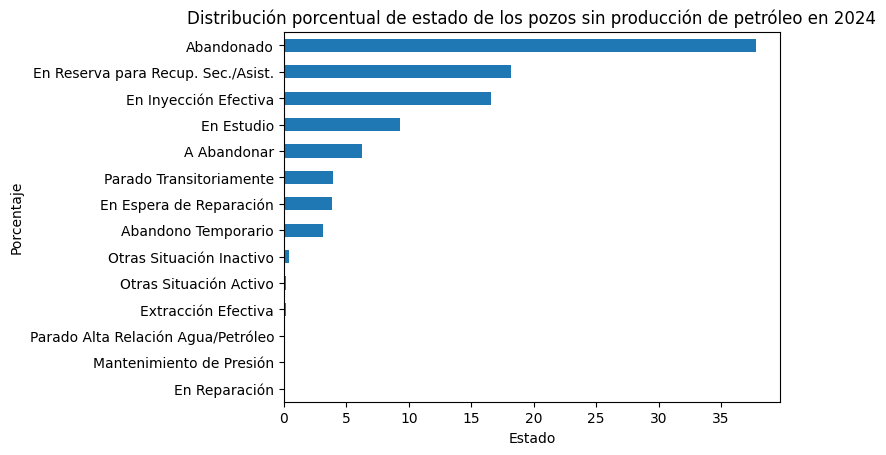

In [67]:
# analizamos el estado de los pozos sin produccion
((pozos_sin_produccion["tipoestado"].value_counts() / pozos_sin_produccion.shape[0]) * 100).sort_values(ascending=True).plot(kind="barh", title="Distribución porcentual de estado de los pozos sin producción de petróleo en 2024", rot=0, ylabel="Porcentaje", xlabel="Estado")

Vemos que estos reportes incluyen pozos que no encuentran operativos por abandono, en reserva, en reparación, etc.

Definimos eliminarlos del análisis y quedarnos solo con los pozos que producieron petroleo en el 2024

In [68]:
mask_pozos_con_produccion = produccion_2024_petroleo["prod_pet"] >= 1
produccion_2024_petroleo = produccion_2024_petroleo[mask_pozos_con_produccion]

<Axes: title={'center': 'Boxplot de producción de petróleo en 2024'}, ylabel='Producción de petróleo (m3)'>

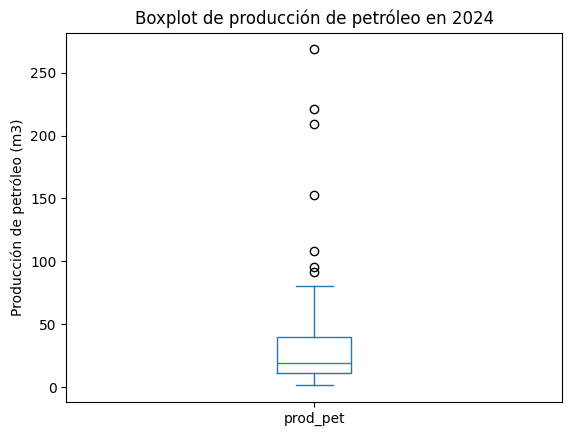

In [69]:
# volvemos a plotear el boxplot
produccion_2024_petroleo["prod_pet"].plot(kind="box", title="Boxplot de producción de petróleo en 2024", ylabel="Producción de petróleo (m3)")

<Axes: title={'center': 'prod_pet'}, xlabel='mes'>

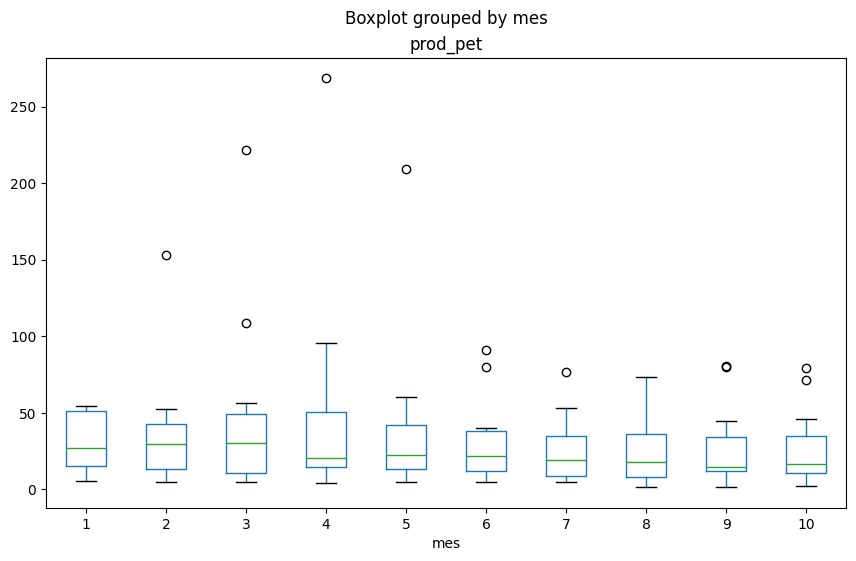

In [70]:
# boxplot por mes
produccion_2024_petroleo.boxplot(column="prod_pet", by="mes", grid=False, rot=0, figsize=(10, 6))

Ahora nos interesa ver la progresión histórica en la producción de petroleo, para ello usamos datos desde 2020 en adelante

In [71]:
# pipvot produccion por anio y mes
produccion_total_pivot = (produccion_total[produccion_total["anio"] > 2019].pivot_table(index="anio", columns="mes", values="prod_pet", aggfunc="sum", fill_value=0)/1000).round(2)

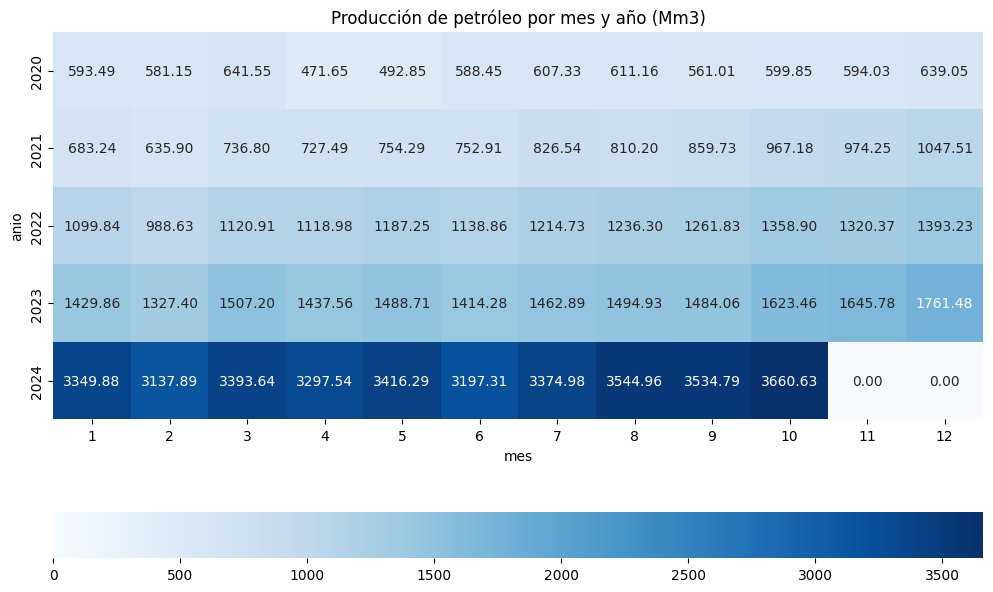

In [72]:
# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(produccion_total_pivot, cmap="Blues", annot=True, fmt=".2f", cbar_kws={'orientation': 'horizontal'})
plt.title("Producción de petróleo por mes y año (Mm3)")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


<Axes: title={'center': 'Variación interanual de producción de petróleo'}, xlabel='Año', ylabel='Variación interanual (%)'>

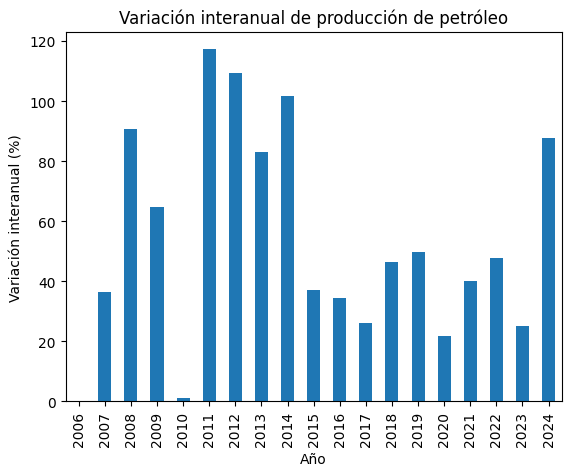

In [73]:
# variacion yoy de produccion
((produccion_total.groupby("anio")["prod_pet"].sum().round(2).pct_change())*100).plot(kind="bar", title="Variación interanual de producción de petróleo", xlabel="Año", ylabel="Variación interanual (%)")

# Reglas de validacion sobre el dataset

## Validacion de geom vs geojson

Luego de investigar, descubrimos que geom es una columna que almacena informacion sobre la ubicacion geografica en formato binario, esta informacion en binario deberia ser consistente con la disponible en la columna geojson. Para validar esto tenemos que extraer las coordenadas y comparar los valores.

In [74]:
import pandas as pd
from shapely.geometry import Point
from shapely.wkb import loads

def extract_coords(wkb_hex):
    # Decode WKB from hex string
    geom = loads(bytes.fromhex(wkb_hex))
    if isinstance(geom, Point):  # Ensure it's a Point geometry
        return geom.y, geom.x  # Latitude (y), Longitude (x)
    return None, None

In [75]:
pozos['geom_latitude'], pozos['geom_longitude'] = zip(*pozos["geom"].apply(extract_coords))

pozos[(pozos["geom_latitude"] != pozos["latitude"]) | (pozos["geom_longitude"] != pozos["longitude"])]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geom_latitude,geom_longitude
4613,SJ.RN.LN-7,10143,LOMA NEGRA,LNE,CAPEX S.A.,LOMA NEGRA,LNE,lajas,NEUQUINA,Rio Negro,396.31,3329.0,EXPLOTACION,DESARROLLO,No informado,No informado,no,Petrolífero,Electrosumergible,Extracción Efectiva,1998-10-19,1998-11-09,1999-02-09,1999-02-20,"{""type"":""Point"",""coordinates"":[-38.756338,-67....",0101000020E61000006C5CFFAECF6043C0682096CD1CE9...,"[-38.756338, -67.642383]",-67.642383,-38.756338,-67.642383,-38.756338
80786,PBE.Nq.M-1063(d),162058,EL MANGRULLO,GRU,PAMPA ENERGIA S.A.,EL MANGRULLO,MGR,agrio,NEUQUINA,Neuquén,649.10,1525.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,TIGHT,no,Gasífero,Surgencia Natural,Extracción Efectiva,2019-06-22,2019-07-03,2020-12-17,2021-01-06,"{""type"":""Point"",""coordinates"":[-38.59006999999...",0101000020E6100000E42CEC69874B43C01B2AC6F99B5A...,"[-38.59007, -69.41577]",-69.415770,-38.590070,-69.415770,-38.590070


Se puede ver que estos que aparecen como distintos es solo por un tema de redondeo. Si usaramos un epsilon estarian todos en margenes. No lo hacemos porque es mucho mas lento y ya con esto podemos ver que cumplen.

## Validacion sigla

Observemos primero las siglas del dataset

In [76]:
pozos['sigla'].head()

0    CH.CH.EaLE.x-1
1    CH.CH.EaLE.x-2
2      CH.CH.EaLE-3
3      CH.CH.EaLE-4
4      CH.CH.EaLE-5
Name: sigla, dtype: object

Podemos ver que muchas empiezan con YPF, seria razonable asumir que las que empizan con eso tienen como empresa a YPF, y que las que tienen como empresa a YPF tienen siglas que comienzan con YPF. Veamos si esto es cierto.

In [77]:
pozos['empresa'].value_counts().head()

empresa
YPF S.A.                               39731
PAN AMERICAN ENERGY SL                  8553
CGC ENERGIA SAU                         6752
COMPAÑÍAS ASOCIADAS PETROLERAS S.A.     3878
TECPETROL S.A.                          2831
Name: count, dtype: int64

In [78]:
pozos_split = pozos['sigla'].str.split('.', n=3, expand=True)
pozos_split.columns = ['sigla_1', 'sigla_2', 'sigla_3', 'sigla_4']
pozos = pd.concat([pozos, pozos_split], axis=1)

In [79]:
pozos[(pozos['sigla_1'] == 'YPF') & (pozos['empresa'] != 'YPF S.A.')].head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geom_latitude,geom_longitude,sigla_1,sigla_2,sigla_3,sigla_4
37,YPF.Ch.LMo.e-7,261,REVERTIDAS - CHUBUT,RECH,NaN,CAÑADON RAMIREZ REVERTIDO,CRRE,formación improductiva,GOLFO SAN JORGE,Chubut,466.0,2000.0,EXPLORACION,EXTENSION,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.72232954279...",0101000020E6100000F3CEB0A53A6E51C027F0E46F86FE...,"[-69.7223295427937, -45.9884776943075]",-69.722330,-45.988478,-45.988478,-69.722330,YPF,Ch,LMo,e-7
38,YPF.Ch.LMo.x-3,262,REVERTIDAS - CHUBUT,RECH,NaN,CAÑADON RAMIREZ REVERTIDO,CRRE,bajo barreal,GOLFO SAN JORGE,Chubut,460.0,2007.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,En Estudio,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.72861772098...",0101000020E610000064BA38ACA16E51C0408E435746FB...,"[-69.728617720984, -45.963084133135]",-69.728618,-45.963084,-45.963084,-69.728618,YPF,Ch,LMo,x-3
39,YPF.Ch.LMN.x-1,263,REVERTIDAS - CHUBUT,RECH,NaN,CAÑADON RAMIREZ REVERTIDO,CRRE,formación improductiva,GOLFO SAN JORGE,Chubut,467.0,2242.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.76095504971...",0101000020E6100000C10ECF7CB37051C06EB06FB657F4...,"[-69.76095504971, -45.9089267773969]",-69.760955,-45.908927,-45.908927,-69.760955,YPF,Ch,LMN,x-1
40,YPF.Ch.LMN.x-2,264,REVERTIDAS - CHUBUT,RECH,NaN,CAÑADON RAMIREZ REVERTIDO,CRRE,formación improductiva,GOLFO SAN JORGE,Chubut,454.0,1806.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.71003558798...",0101000020E6100000405A1B39716D51C0E9675D4BFFF7...,"[-69.7100355879893, -45.9374784666141]",-69.710036,-45.937478,-45.937478,-69.710036,YPF,Ch,LMN,x-2
41,YPF.Ch.LMN.x-3,265,REVERTIDAS - CHUBUT,RECH,NaN,CAÑADON RAMIREZ REVERTIDO,CRRE,bajo barreal,GOLFO SAN JORGE,Chubut,455.0,1864.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Parado Alta Relación Agua/Petróleo,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.73939878642...",0101000020E61000008599494F526F51C0A55B341987F4...,"[-69.7393987864253, -45.9103728776602]",-69.739399,-45.910373,-45.910373,-69.739399,YPF,Ch,LMN,x-3


Aca podemos ver una lista de ~13000 entradas para las cuales podria revisarse si la empresa es correcta.

## Yacimiento y cuenca
Se podria validar que no haya un yacimiento con 2 cuencas distintas asignadas. Con esto podriamos identificar pozos con yacimiento o cuenca potencialmente mal cargados.

In [80]:
yacimiento_cuenca_count = pozos.groupby('yacimiento')['cuenca'].nunique()

yacimientos_with_multiple_cuencas = yacimiento_cuenca_count[yacimiento_cuenca_count > 1].index

yacimientos_with_multiple_cuencas

Index(['ANGOSTURA', 'CERRO CORTADO', 'CERRO NEGRO', 'EL CONDOR', 'EL CORDON',
       'EL GUADAL', 'EL MOLINO', 'EL PUMA', 'EL QUEMADO', 'EL TORDILLO',
       'EL TRIANGULO', 'EL VALLE', 'GUANACO', 'JACHAL', 'LA ESPERANZA',
       'LAS LAGUNAS', 'LOS LEONES', 'PASO DE INDIOS', 'POZOS SIN YACIMIENTO',
       'PUESTO VERA', 'PUNTA NORTE', 'RIO CHICO', 'SAN FRANCISCO',
       'SIERRA NEGRA', 'TRES PICOS', 'ZORRO'],
      dtype='object', name='yacimiento')

In [81]:
pozos[pozos['yacimiento'].isin(yacimientos_with_multiple_cuencas)].head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geom_latitude,geom_longitude,sigla_1,sigla_2,sigla_3,sigla_4
35,CH.CH.PV.x-1,251,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,PUESTO VERA,PUV,comodoro rivadavia,GOLFO SAN JORGE,Chubut,258.38,1073.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-10-03,1997-10-12,1997-10-17,1997-11-01,"{""type"":""Point"",""coordinates"":[-68.65210600000...",0101000020E6100000A0E1CD1ABC2951C0EEB25F77BAD1...,"[-68.652106, -45.638503]",-68.652106,-45.638503,-45.638503,-68.652106,CH,CH,PV,x-1
151,CLE.Ch.CN-1000,454,CERRO NEGRO,CENE,Pilgrim Energy S.A.,CERRO NEGRO,CNE,bajo barreal,GOLFO SAN JORGE,Chubut,280.00,1618.0,No informado,No informado,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,En Inyección Efectiva,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.89344599999...",0101000020E61000007DAF21382E3951C050DC966D4CE1...,"[-68.893446, -45.7601449]",-68.893446,-45.760145,-45.760145,-68.893446,CLE,Ch,CN-1000,None
188,CLE.Ch.CN-1003,494,CERRO NEGRO,CENE,Pilgrim Energy S.A.,CERRO NEGRO,CNE,bajo barreal,GOLFO SAN JORGE,Chubut,279.00,1479.0,No informado,No informado,No informado,No informado,no,Gasífero,Surgencia Natural,Extracción Efectiva,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.92822839999...",0101000020E6100000FA4D1718683B51C078CA0F012CE1...,"[-68.9282284, -45.7591554]",-68.928228,-45.759155,-45.759155,-68.928228,CLE,Ch,CN-1003,None
189,CLE.Ch.CN-1004,495,CERRO NEGRO,CENE,Pilgrim Energy S.A.,CERRO NEGRO,CNE,bajo barreal,GOLFO SAN JORGE,Chubut,276.00,1507.0,No informado,No informado,No informado,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.92823529999...",0101000020E6100000891F0835683B51C0854F841E7BE0...,"[-68.9282353, -45.7537573]",-68.928235,-45.753757,-45.753757,-68.928235,CLE,Ch,CN-1004,None
190,CLE.Ch.CN-1006,496,CERRO NEGRO,CENE,Pilgrim Energy S.A.,CERRO NEGRO,CNE,bajo barreal,GOLFO SAN JORGE,Chubut,284.00,1606.0,No informado,No informado,No informado,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.92050120000...",0101000020E6100000717BDD7DE93A51C0B8955E9B8DE2...,"[-68.9205012, -45.7699465]",-68.920501,-45.769947,-45.769947,-68.920501,CLE,Ch,CN-1006,None


## Tipo de recurso y dataset al que pertenece
Veamos los tipos de recursos de los yacimientos de los que disponemos

In [83]:
pozos['tipo_recurso'].value_counts()

tipo_recurso
CONVENCIONAL       57653
No informado       22064
NO CONVENCIONAL     4204
SIN RESERVORIO       406
NO DISCRIMINADO        5
Name: count, dtype: int64

In [84]:
faltantes_prod_24 = pozos[
    (pozos['tipo_recurso'] == 'CONVENCIONAL') & 
    (~pozos['idpozo'].isin(produccion_2024['idpozo']))
]

faltantes_prod_24.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geom_latitude,geom_longitude,sigla_1,sigla_2,sigla_3,sigla_4
204,YPF.Nq.CN.x-1,521,COVUNCO NORTE SUR REVERTIDO,CONS,NaN,COVUNCO NORTE SUR REVERTIDO,CNSR,formación improductiva,NEUQUINA,Neuquén,908.40,1765.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Otro tipo,Sin Sistema de Extracción,Otras Situación Inactivo,1941-04-12,1941-09-25,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.59229999999...",0101000020E6100000EE5A423EE86551C034A2B437F83A...,"[-69.5923, -38.4607]",-69.592300,-38.460700,-38.460700,-69.592300,YPF,Nq,CN,x-1
205,YPF.Nq.CN.x-2,522,COVUNCO NORTE SUR,Z041,NaN,COVUNCO NORTE SUR,Y059,mulichinco,NEUQUINA,Neuquén,850.93,2105.0,EXPLORACION,EXTENSION,CONVENCIONAL,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandono Temporario,1976-05-03,1976-07-29,1976-10-14,1976-10-31,"{""type"":""Point"",""coordinates"":[-70.05033421188...",0101000020E6100000E67AFCAC388351C02076E9D5A367...,"[-70.050334211886, -38.809687365527]",-70.050334,-38.809687,-38.809687,-70.050334,YPF,Nq,CN,x-2
206,YPF.Nq.CN.x-3,523,COVUNCO NORTE SUR,Z041,NaN,COVUNCO NORTE SUR,Y059,quintuco,NEUQUINA,Neuquén,857.96,1844.0,EXPLORACION,EXTENSION,CONVENCIONAL,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandonado,1983-11-05,1983-12-17,1984-01-11,1984-01-22,"{""type"":""Point"",""coordinates"":[-70.04958693873...",0101000020E6100000C90BB26E2C8351C0ED3A1917F567...,"[-70.049586938737, -38.812167060203]",-70.049587,-38.812167,-38.812167,-70.049587,YPF,Nq,CN,x-3
211,AEC.Nq.CAz.x-1,529,COVUNCO NORTE SUR,Z041,NaN,COVUNCO NORTE SUR,Y059,formación improductiva,NEUQUINA,Neuquén,838.41,2348.0,EXPLORACION,EXPLORATORIO SOMERO,CONVENCIONAL,No informado,no,Otro tipo,Sin Sistema de Extracción,Otras Situación Inactivo,1997-10-15,1997-12-05,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.93860762624...",0101000020E610000000A1B825127C51C0A2AF1D5B3060...,"[-69.938607626249, -38.751475705619]",-69.938608,-38.751476,-38.751476,-69.938608,AEC,Nq,CAz,x-1
960,YPF.Nq.CCo-01,5828,CUTRAL CO,LCO,NaN,CUTRAL CO,CUC,lajas,NEUQUINA,Neuquén,631.97,612.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Sin Sistema de Extracción,En Estudio,1950-08-09,1950-08-30,1950-09-03,1950-09-25,"{""type"":""Point"",""coordinates"":[-69.23779899999...",0101000020E610000060014C19384F51C0C74CA25EF079...,"[-69.237799, -38.952648]",-69.237799,-38.952648,-38.952648,-69.237799,YPF,Nq,CCo-01,None


In [85]:
faltantes_prod_24 = faltantes_prod_24[~pozos['tipoestado'].isin(['Abandonado', 'Otras Situación Inactivo', 'Parado Transitoriamente', 'En Estudio', 'A Abandonar', 'En Reserva para Recup. Sec./Asist.', 'Parado Alta Relación Agua/Petróleo', 'En Espera de Reparación', 'Abandono Temporario'])]
faltantes_prod_24

/tmp/ipykernel_11836/543144954.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  faltantes_prod_24 = faltantes_prod_24[~pozos['tipoestado'].isin(['Abandonado', 'Otras Situación Inactivo', 'Parado Transitoriamente', 'En Estudio', 'A Abandonar', 'En Reserva para Recup. Sec./Asist.', 'Parado Alta Relación Agua/Petróleo', 'En Espera de Reparación', 'Abandono Temporario'])]


,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geom_latitude,geom_longitude,sigla_1,sigla_2,sigla_3,sigla_4
1015,YPF.Nq.CCo-40,5894,CUTRAL CO,LCO,NaN,CUTRAL CO,CUC,lajas,NEUQUINA,Neuquén,636.82,524.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1952-07-12,1952-07-21,1952-07-23,1952-08-02,"{""type"":""Point"",""coordinates"":[-69.21888866000...",0101000020E6100000940A9545024E51C044492F07CD79...,"[-69.21888866, -38.95156946]",-69.218889,-38.951569,-38.951569,-69.218889,YPF,Nq,CCo-40,None
1016,YPF.Nq.CCo-48,5895,CUTRAL CO,LCO,NaN,CUTRAL CO,CUC,lajas,NEUQUINA,Neuquén,625.91,554.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1953-04-24,1953-05-03,1953-05-05,1953-05-13,"{""type"":""Point"",""coordinates"":[-69.21455104999...",0101000020E6100000A3C45334BB4D51C05EFC44D05E79...,"[-69.21455105, -38.94820598]",-69.214551,-38.948206,-38.948206,-69.214551,YPF,Nq,CCo-48,None
1018,YPF.Nq.CCo-87,5897,CUTRAL CO,LCO,NaN,CUTRAL CO,CUC,lajas,NEUQUINA,Neuquén,642.14,495.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1954-03-28,1954-04-07,1954-04-08,1954-04-14,"{""type"":""Point"",""coordinates"":[-69.22155327000...",0101000020E6100000333EC4ED2D4E51C086236142F979...,"[-69.22155327, -38.95291929]",-69.221553,-38.952919,-38.952919,-69.221553,YPF,Nq,CCo-87,None
3518,YPF.Nq.ES-129,9049,EL SAUCE,ELS,ENERGIA COMPAÑIA PETROLERA S.A.,EL SAUCE,ELS,challacó,NEUQUINA,Neuquén,404.65,0.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1961-02-01,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.40581000000...",0101000020E6100000F29881CAF85951C030F5F3A622BD...,"[-69.40581, -39.47762]",-69.405810,-39.477620,-39.477620,-69.405810,YPF,Nq,ES-129,None
3527,YPF.Nq.ES-137,9058,EL SAUCE,ELS,ENERGIA COMPAÑIA PETROLERA S.A.,EL SAUCE,ELS,challacó,NEUQUINA,Neuquén,411.84,864.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1962-01-01,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.41644999999...",0101000020E6100000D49AE61DA75A51C0056EDDCD53BD...,"[-69.41645, -39.47912]",-69.416450,-39.479120,-39.479120,-69.416450,YPF,Nq,ES-137,None
3558,YPF.Nq.ES-35,9089,EL SAUCE,ELS,ENERGIA COMPAÑIA PETROLERA S.A.,EL SAUCE,ELS,challacó,NEUQUINA,Neuquén,394.00,838.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Cavidad Progresiva,Extracción Efectiva,1958-01-01,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.32065000000...",0101000020E610000098DD9387855451C0397F130A11BC...,"[-69.32065, -39.46927]",-69.320650,-39.469270,-39.469270,-69.320650,YPF,Nq,ES-35,None
3559,YPF.Nq.ES-36,9090,EL SAUCE,ELS,ENERGIA COMPAÑIA PETROLERA S.A.,EL SAUCE,ELS,challacó,NEUQUINA,Neuquén,396.23,835.0,SERVICIO,INYECTOR DE AGUA,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1957-11-01,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.33811,-39.4...",0101000020E6100000D61C2098A35551C0AB5B3D27BDBB...,"[-69.33811, -39.46671]",-69.338110,-39.466710,-39.466710,-69.338110,YPF,Nq,ES-36,None
3595,YPF.Nq.ES-7,9126,EL SAUCE,ELS,ENERGIA COMPAÑIA PETROLERA S.A.,EL SAUCE,ELS,challacó,NEUQUINA,Neuquén,393.03,832.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Cavidad Progresiva,Extracción Efectiva,1957-07-01,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-69.32792999999...",0101000020E610000025581CCEFC5451C0800EF3E505BC...,"[-69.32793, -39.46893]",-69.327930,-39.468930,-39.468930,-69.327930,YPF,Nq,ES-7,None
3599,YPF.Nq.ES-73,9130,EL SAUCE,ELS,ENERGIA CO

Estos pozos encontrados deberian en teoria figurar en el dataset de convencionales_2024 y habria que revisarlos.

In [87]:
pozos[
    (pozos['tipo_recurso'] == 'NO CONVENCIONAL') & 
    (~pozos['idpozo'].isin(prod_no_convencional['idpozo']))
]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geom_latitude,geom_longitude,sigla_1,sigla_2,sigla_3,sigla_4
